<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-2-Sprint-2-Regression/blob/master/Hira_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm


In [335]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

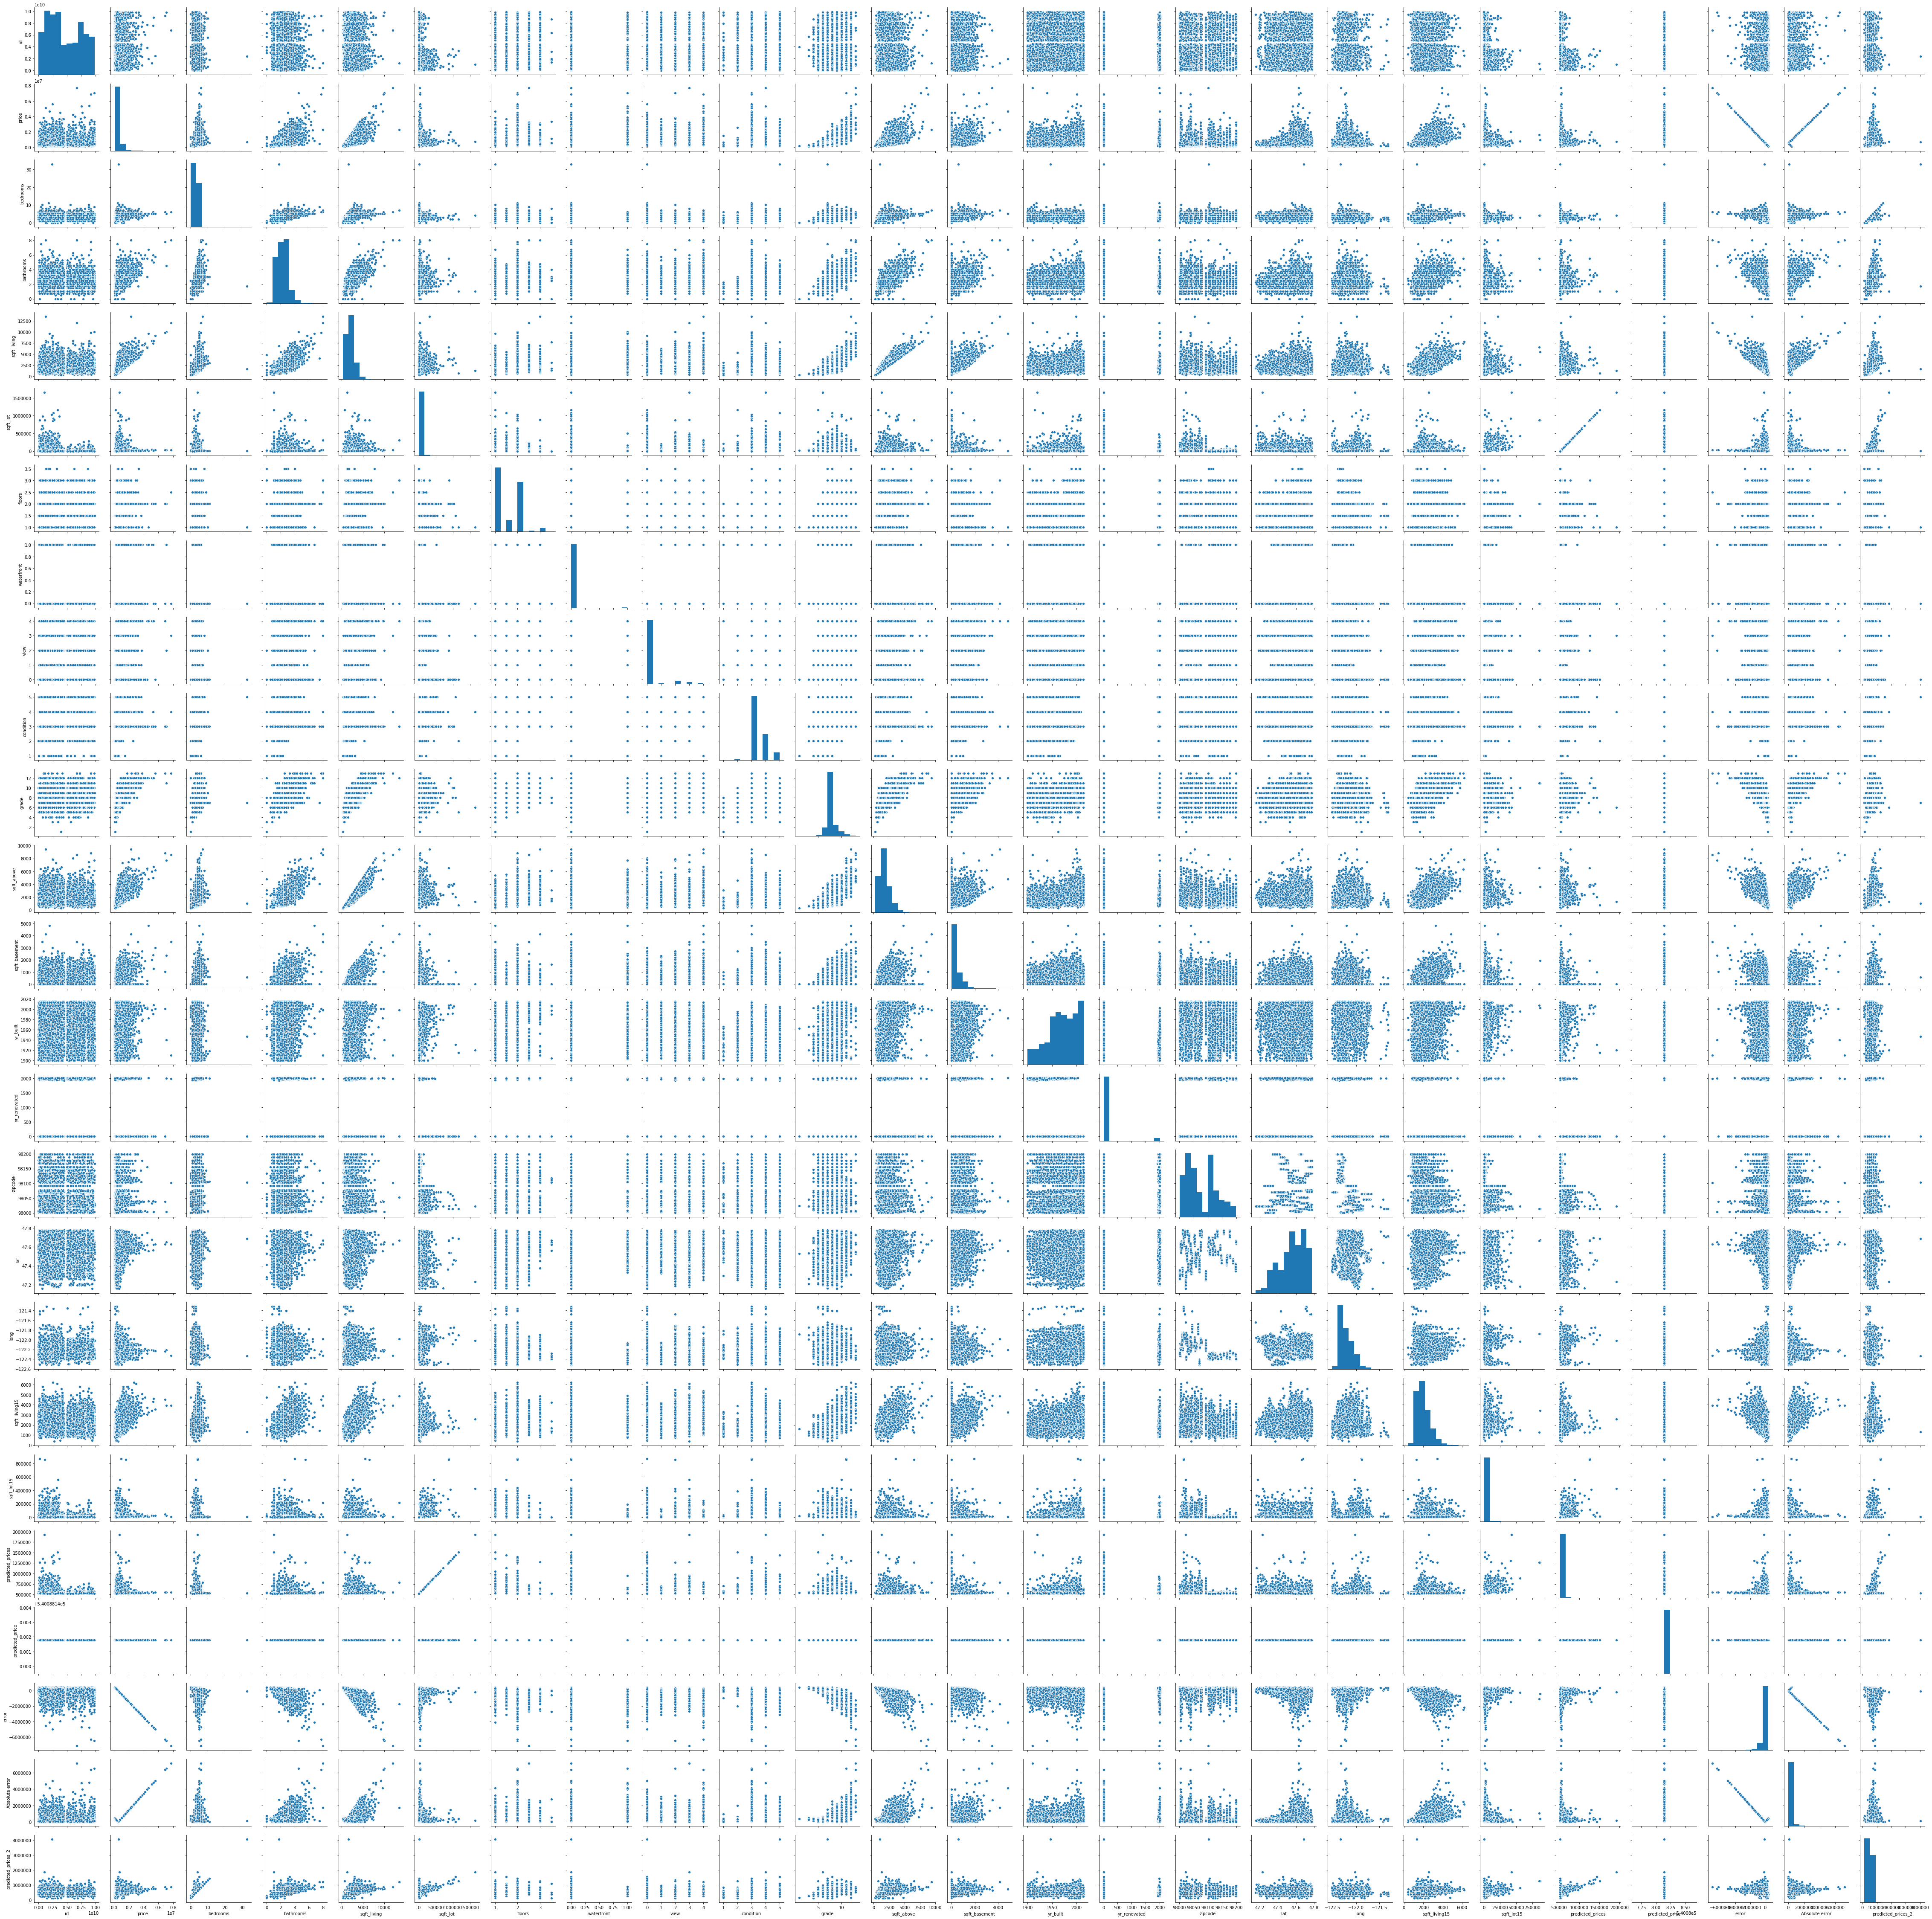

In [288]:
sns.pairplot(df)

I want X to be sqft_lot because I think that makes the most difference when it comes to pricing of the houses so:


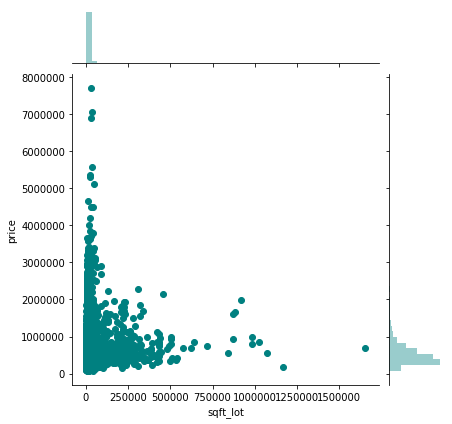

In [336]:
##### Your Code Here #####
sns.jointplot("sqft_lot", "price", data=df, color = 'teal')


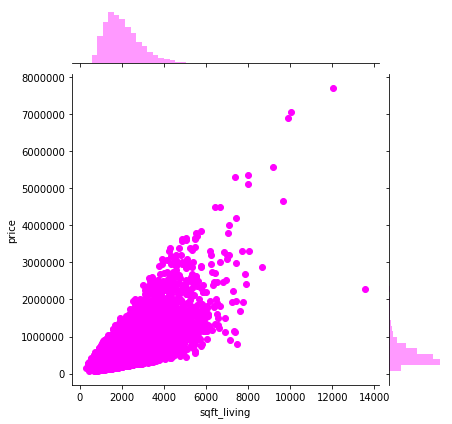

In [337]:
sns.jointplot('sqft_living', 'price', data = df, color = 'magenta')

In [338]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.

#Linear Regression Model#

Splitting dataset:

In [339]:
feature = 'sqft_living'
target = 'price'

X = df[[feature]]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((17290, 1), (4323, 1), (17290,), (4323,))

In [0]:
X_train

In [341]:
model = LinearRegression()
model.fit(X_train,y_train)
model.predict(X_test)



array([ 536679.20714266,  768709.67397433, 1011922.33197861, ...,
        638437.14681341,  586999.06741941,  676456.59680029])

In [342]:
model.coef_, model.intercept_


print("Coefficient: ", model.coef_)
print("Intercept:", model.intercept_)

Coefficient:  [279.55477932]
Intercept: -41999.18603993731


In [343]:
model.predict([[10000]])

array([2753548.6071127])

In [344]:
model.predict([[60000]])

array([16731287.57287589])

In [345]:
model.predict(X_test)

array([ 536679.20714266,  768709.67397433, 1011922.33197861, ...,
        638437.14681341,  586999.06741941,  676456.59680029])

In [0]:
df['predicted_prices'] = model.predict(X)

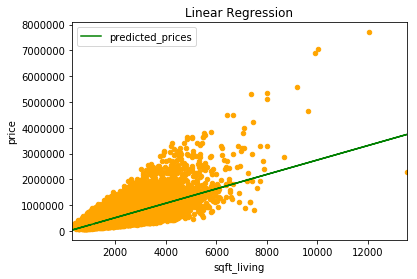

In [347]:
ax = df.plot(x = feature, y = target, kind = 'scatter', title = 'Linear Regression', color = 'orange')
df.plot(x = feature, y = 'predicted_prices' , kind = 'line', ax = ax, color = 'green');


In [348]:
target = 'price'
df['predicted_price'] = df[target].mean()
df['error'] = df['predicted_price'] - df[target]

df['Absolute error'] = df['error'].abs()
mean_absolute_error(y_true = df[target], y_pred = df['predicted_price'])

233941.72427250765

In [349]:
r2_score(y_true = df[target], y_pred = df['predicted_price'])

0.0

In [350]:
print("Mean^2 Error:", np.sqrt(mean_squared_error(y_true = y, y_pred = model.predict(X))))



Mean^2 Error: 261443.41984286328


In [351]:
model.score(X,y)

0.49284301620140614

In [352]:
print('Percentage of y accounted for by X:', r2_score(y, model.predict(X)))

Percentage of y accounted for by X: 0.49284301620140614


Ha! Higher percentage shows that it fits the data most closely. So that explains that my model doesn't fit the data closely at all. ugh 

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
##### Your Code Here #####

from sklearn.model_selection import train_test_split

features = ['sqft_lot', 'bedrooms']
target = 'price'
X2 = df[features]
y2 = df[target]

In [354]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.80, test_size = 0.20, random_state = 42)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape



((17290, 2), (4323, 2), (17290,), (4323,))

In [0]:
model = LinearRegression()
model.fit(X2_train, y2_train)
predictions = model.predict(X2_test) #can't add to df because split, not equal

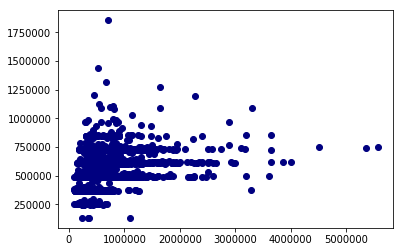

In [326]:
ax = plt.scatter(y2_test, predictions, color = 'navy')

In [264]:
model2.coef_, model2.intercept_


(array([7.58910966e-01, 1.18651559e+05]), 126902.86806771345)

HA! Gotcha!

In [265]:
model2.predict(X2_test)

array([608258.0985365 , 725268.13293053, 609775.92046784, ...,
       604848.31156775, 609180.17535979, 610216.08882793])

So this is if the area is 2000sqft and there are 3 bedrooms. let's see if price drastically changes when the sqft value goes up by 100 or bedroom number goes up by 1.     

In [358]:
print("Mean^2 Error:", np.sqrt(mean_squared_error(y_true = y2, y_pred = model.predict(X2))))


Mean^2 Error: 348010.91750794963


In [359]:
print('Percentage of y accounted for by X:', r2_score(y2, model.predict(X2)))

Percentage of y accounted for by X: 0.10138696133606129


This is all over the place but initially I had square_lot as the only X variables so for this question I had square_lot and bedrooms. But I changed the sqft_lot to sqft_living so I had a higher R^2 score but this one is only 10% showing that the percentage of Y accounts for by X is really low than what is being shown in the previous question. 

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

X3 = df.drop(columns = ['price', 'date'])
y3 = df['price']

In [361]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, train_size = 0.80, test_size = 0.20, random_state = 42)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape



((17290, 23), (4323, 23), (17290,), (4323,))

In [0]:
model = LinearRegression()
model.fit(X3_train, y3_train)
predictions = model.predict(X3_test)

In [363]:
X3_test.shape

(4323, 23)

In [364]:
y3_test.shape

(4323,)

In [368]:
predictions.shape

(4323,)

In [369]:
y3_test.shape

(4323,)

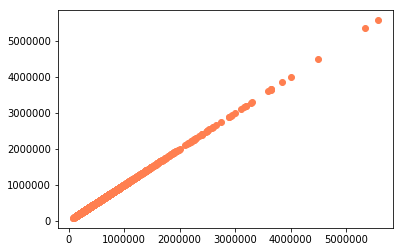

In [370]:
#ax = plt.scatter(X_test, y_test, color = 'coral')
plt.scatter(y3_test, y = predictions , color = 'coral')

so i got rid of date column because it was formatted differently, next I am either going to change it to datetime or get rid of T. 


In [371]:
print("Mean^2 Error:", np.sqrt(mean_squared_error(y_true = y3, y_pred = model.predict(X3))))


Mean^2 Error: 1.1426173153195796e-10


In [372]:
print('Percentage of y accounted for by X:', r2_score(y3, model.predict(X3)))

Percentage of y accounted for by X: 1.0


So it is fully accounted for by X. Very interesting but then it makes sense since we used all of the features. 

###I wanna see if i can do PCA and then perform linear regression


In [374]:
df.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'predicted_prices',
 'predicted_price',
 'error',
 'Absolute error']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
df_pca = np.array(df[['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']])

In [376]:
scaler = StandardScaler()
scaler.fit(df_pca)
scaled = pd.DataFrame(scaler.transform(df_pca))
scaled.head(2)

0         1         2         3         4         5         6   \
0  0.886146 -0.398737 -1.447464 -0.979835 -0.228321 -0.915427 -0.087173   
1  0.637511 -0.398737  0.175607  0.533634 -0.189885  0.936506 -0.087173   

         7         8         9         10        11        12        13  \
0 -0.305759 -0.629187 -0.558836 -0.734708 -0.658681 -0.544898 -0.210128   
1 -0.305759 -0.629187 -0.558836  0.460841  0.245141 -0.681079  4.746678   

         14        15        16        17        18  
0  1.870152 -0.352572 -0.306079 -0.943355 -0.260715  
1  0.879568  1.161568 -0.746341 -0.432686 -0.187868

In [378]:
pca = PCA(3)
pca.fit(scaled)

pca_df = pd.DataFrame(pca.transform(scaled), columns = ['PC_1', 'PC_2'])

pca_df.head(2)

PC_1      PC_2
0 -2.651273 -0.035935
1 -0.236911  1.689646

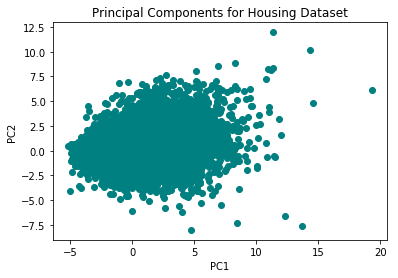

In [380]:
plt.scatter(pca_df['PC_1'], pca_df['PC_2'], color = 'teal')
plt.title('Principal Components for Housing Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
